# Data Visualizations

In [43]:
#Code Block 1
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid")

%matplotlib inline

In [44]:
#Code Block 2
## load the cleaned data

df_train = pd.read_csv("../../Data/cleaned/cleaned_train.csv")
df_test = pd.read_csv("../../Data/cleaned/cleaned_test.csv")

display(df_train.head())
display(df_train.info())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


None

In [45]:
#Code Block 3
## view the test data
display(df_test.head())
display(df_test.info())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1
3,895,3,male,27.0,0,0,8.6625,S,Mr,1
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
 9   family_size  418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


None

## Accurate Visualizations

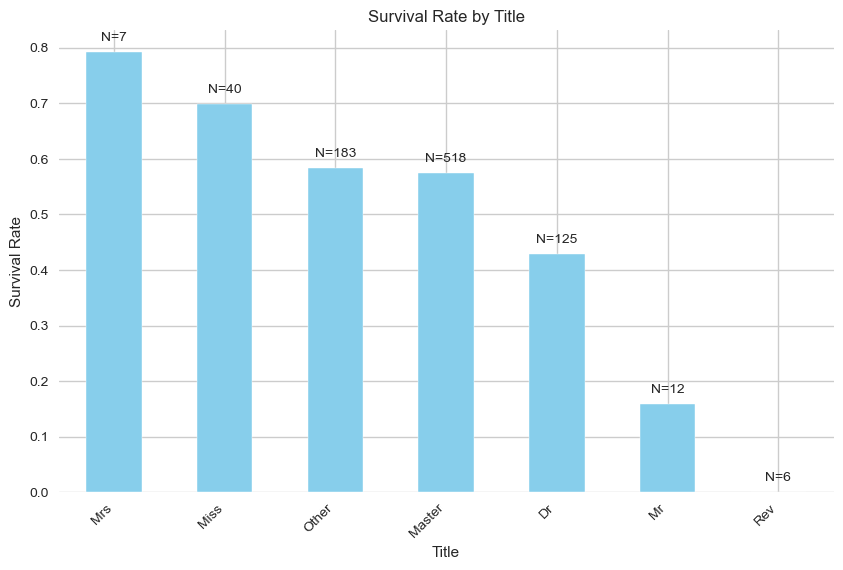

In [46]:
#Code Block 4
## survival rate by title
df_combined = pd.concat([df_train, df_test], ignore_index=True)

### calculate survival rate by title
survival_by_title = df_combined.groupby('Title')['Survived'].mean()
### calculate the sample size 
sample_size = df_combined.groupby('Title')['Survived'].count()
### calculate standard error for error bars
std_err = df_combined.groupby('Title')['Survived'].apply(sem)

## 95% confidence intervals
ci = 1.96 * std_err

## order by survival rate
survival_by_title = survival_by_title.sort_values(ascending=False)

## plot survival rate with annotated sample sizes
ax = survival_by_title.plot(kind='bar', yerr=ci, capsize=4, figsize = (10, 6), color = 'skyblue')
plt.title("Survival Rate by Title")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Survival Rate")
plt.xlabel("Title")

## annotate the plot to show sample sizes
for i, val in enumerate(survival_by_title):
    ax.text(i, val + 0.02, f'N={sample_size.iloc[i]}', ha='center', fontsize = 10)



## savefig for future use
plt.savefig("../../Analysis/accurate/survival_rate_bytitle.png")
plt.show()

#### Caption: Derivation and Cleaning of the `Title` Column

The `Title` column was extracted from the `Name` column in the Titanic dataset. It represents the honorifics or titles (e.g., "Mr.", "Mrs.", "Miss.") used in passenger names. To ensure consistency, the titles were cleaned by:
- Stripping whitespace and converting to lowercase.
- Grouping rare titles into broader categories (e.g., "Jonkheer.", "Don." → "Other").
- Standardizing common titles (e.g., "Ms" → "Miss", "Sir" → "Mr").

This cleaning process ensures that the titles are consistent and meaningful for analysis.

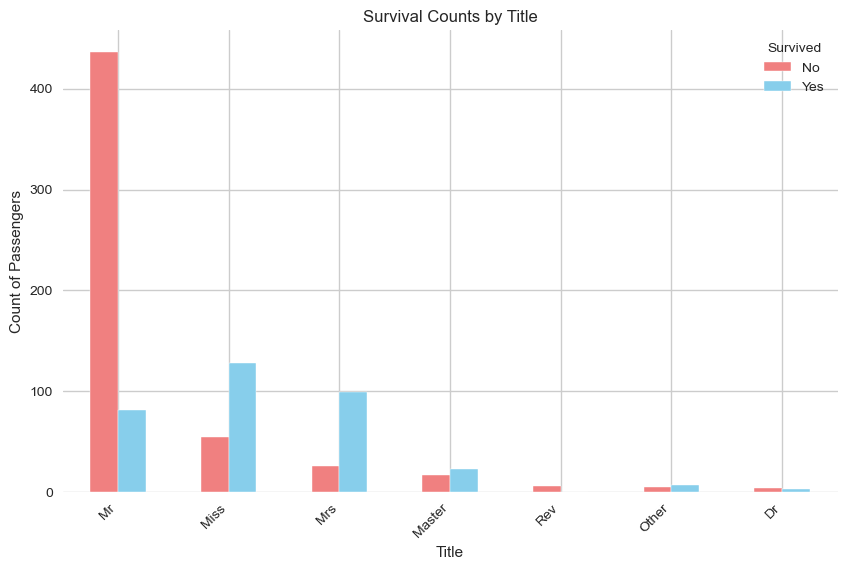

In [47]:
#Code Block 5
## stacked bar with raw counts of survivors

counts_by_title = df_combined.groupby(['Title', 'Survived']).size().unstack(fill_value=0)

counts_by_title = counts_by_title.sort_values(by = 0,ascending=False)
## plot the stacked bar chart
ax = counts_by_title.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightcoral', 'skyblue'])
plt.title("Survival Counts by Title")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count of Passengers")
plt.xlabel("Title")
plt.legend(title='Survived', labels=['No', 'Yes'])

## savefig for future use
plt.savefig("../../Analysis/accurate/survival_counts_bytitle.png")
plt.show()

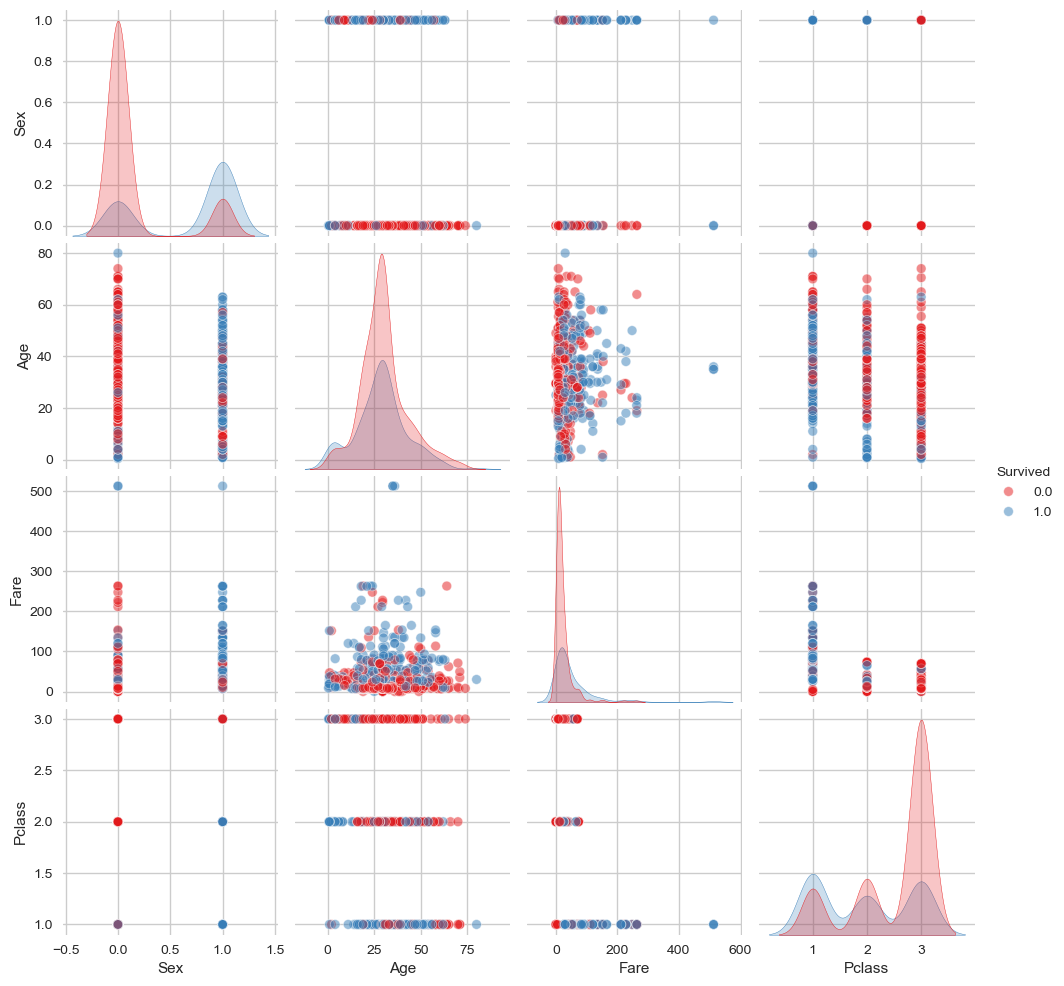

In [48]:
#Code Block 6
## pairplot for survival

### encode the sex column
df_combined['Sex'] = df_combined['Sex'].map({'male': 0, 'female': 1})

sns.pairplot(df_combined, hue='Survived', vars=['Sex','Age', 'Fare', 'Pclass'], palette='Set1', diag_kind = 'kde', plot_kws={'alpha': 0.5})
plt.savefig("../../Analysis/accurate/pairplot_survival.png")
plt.show()

#### Caption: Pairplot of Survival and Selected Features
This pairplot visualizes the relationship between survival (`Survived`) and several key features:
- `Pclass`: Passenger class (1st, 2nd, 3rd).
- `Age`: Age of the passenger.
- `Fare`: Ticket fare paid.
- `Sex`: Gender of the passenger (encoded as 0 = male, 1 = female).

The diagonal shows kernel density estimates for each feature, while the scatterplots show pairwise relationships. The `hue` parameter differentiates survivors (red) and non-survivors (blue).

## Misleading Visualizations

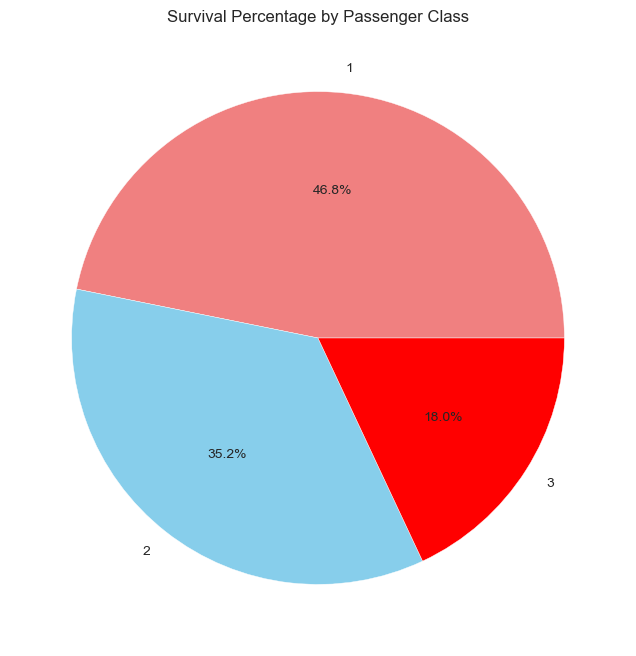

In [55]:
#Code Block 7
## pie chart for survival percentage by class

survival_by_class = df_combined.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['lightcoral', 'skyblue', 'red'], figsize=(8, 8))
plt.title("Survival Percentage by Passenger Class")
plt.ylabel("")  # Hide the y-label for better aesthetics
plt.savefig("../../Analysis/misleading/survival_percentage_byclass.png")
plt.show()

#### Why this pie chart is misleading

This pie chart is misleading compared to the earlier, more accurate plots for two main reasons:

1. **Color inconsistency**
    - In the stacked bar chart, colors were tied to meaning: one color for **not survived** and another for **survived**.
    - In this pie chart, colors are assigned to **passenger classes** (`Pclass`), not survival outcomes.
    - Because similar colors are reused without the same meaning, viewers may incorrectly interpret slices as survival categories.

2. **Segment-size interpretation issues**
    - Pie slices encode the **average survival rate by class**, not counts of survivors vs non-survivors.
    - Larger slices can be perceived as “more survivors,” even though they only represent a higher proportion, not a larger number of people.
    - This is less precise than the earlier bar-based visuals, which made category comparisons and group sizes clearer.

Overall, the chart mixes visual conventions from earlier survival-status plots but applies them to a different variable (`Pclass`), which can confuse interpretation.

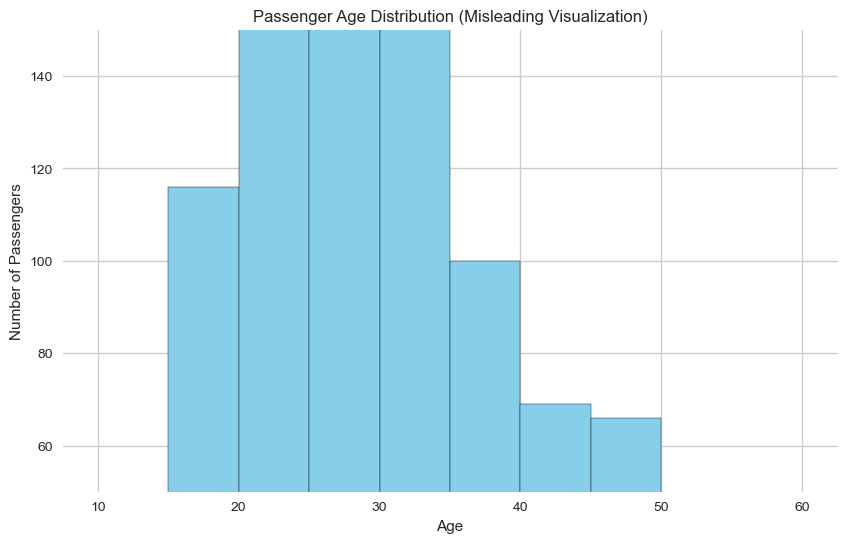

In [58]:
#Code Block 8
import matplotlib.pyplot as plt

# Cherry-pick data: Exclude passengers under 10 or over 60
df_cherry_picked = df_combined[(df_combined['Age'] >= 10) & (df_combined['Age'] <= 60)]

# Create a histogram with a truncated Y-axis
plt.figure(figsize=(10, 6))
plt.hist(df_cherry_picked['Age'], bins=10, color='skyblue', edgecolor='black')

# Truncate the Y-axis to exaggerate differences
plt.ylim(50, 150)  # Start Y-axis at 50 instead of 0

# Add misleading title and labels
plt.title("Passenger Age Distribution (Misleading Visualization)")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

# Save the misleading visualization
plt.savefig("../../Analysis/misleading/passenger_age_distribution_truncated.png")
plt.show()

#### Why This Visualization is Misleading:
Truncated Y-Axis:

* Starting the Y-axis at 50 instead of 0 exaggerates the differences between age groups, making it seem like certain age ranges are far more common than they actually are.

Cherry-Picking Data:

* Excluding passengers under 10 or over 60 removes a significant portion of the dataset, distorting the overall age distribution. For example, if there were many children or elderly passengers, this would not be reflected in the chart.

Misleading Title:

* The title does not mention the cherry-picking or the truncated Y-axis, leading the audience to believe the visualization represents the full dataset.

#### How to Make It Accurate:
Include All Data:

* Use the full range of ages in the dataset to provide an accurate representation of the age distribution.

Start the Y-Axis at 0:

* Avoid truncating the Y-axis to ensure the differences between age groups are not exaggerated.

Provide Context:

* Clearly label the chart and include a caption explaining the data and any preprocessing steps.

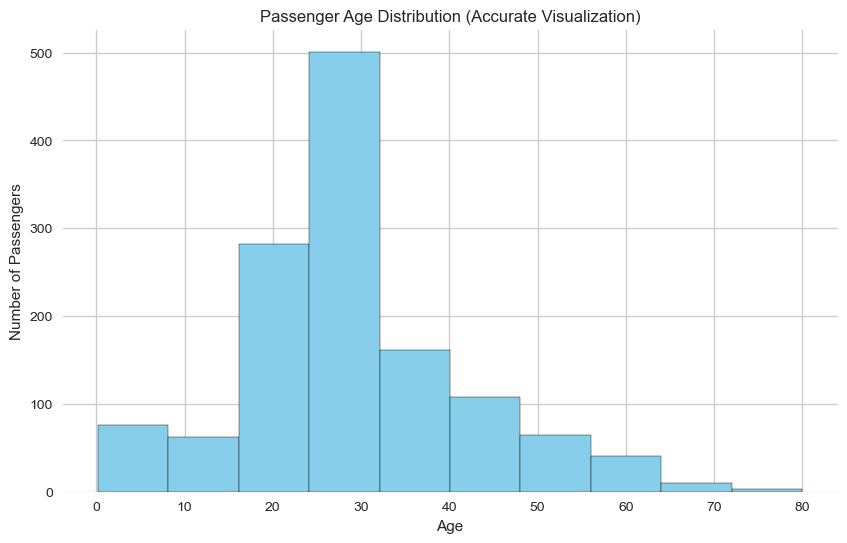

In [59]:
#Code Block 9
## accurate version

# Use the full dataset
plt.figure(figsize=(10, 6))
plt.hist(df_combined['Age'].dropna(), bins=10, color='skyblue', edgecolor='black')

# Start Y-axis at 0
plt.ylim(0, None)

# Add accurate title and labels
plt.title("Passenger Age Distribution (Accurate Visualization)")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

# Save the accurate visualization
plt.savefig("../../Analysis/accurate/passenger_age_distribution.png")
plt.show()